In [1]:
import pandas as pd
import torch
import numpy as np

from sklearn.model_selection import train_test_split
from utils.covariate_data_processing import pbc2_proccess_covariate, padded_mask_processing

In [2]:
df = pd.read_csv(
    "/Users/davidlee/Documents/GitHub/Surtimesurvival/Data Project/Pycox Lib/PBC2 Convariate Data/pbc2_data_merged_timegan_auton_covariate.csv")

In [3]:
df.head()

,event,time,seq_id,seq_time_id,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,0,0.569489,-1.490373,0.265298,-1.074325,0.279377,-0.480089,0.264303,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0,1.095170,0.310273,0.265298,-1.831287,0.381746,-0.398600,1.021397,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,1,5.319790,-0.372825,1.421093,-1.675442,-0.631323,-1.446320,0.491431,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,1,6.261636,0.050695,1.421093,-1.386015,-0.525090,-1.294982,0.491431,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,1,7.266455,0.415470,1.421093,-1.541860,-0.446865,-1.411396,0.491431,...,0,1,0,1,0,0,1,0,1,0


In [4]:
df_temp = df.loc[0:, ['seq_id', 'seq_time_id', 'event', 'time']]
df = df.drop(columns=['seq_id', 'seq_time_id'])

In [5]:
df.head()

,event,time,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,-1.490373,0.265298,-1.074325,0.279377,-0.480089,0.264303,3.865908,0.016353,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0.310273,0.265298,-1.831287,0.381746,-0.398600,1.021397,2.422955,-0.524945,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,-0.372825,1.421093,-1.675442,-0.631323,-1.446320,0.491431,0.322185,-0.743389,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,0.050695,1.421093,-1.386015,-0.525090,-1.294982,0.491431,0.109986,-0.679676,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,0.415470,1.421093,-1.541860,-0.446865,-1.411396,0.491431,0.237306,0.016353,...,0,1,0,1,0,0,1,0,1,0


In [6]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [7]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

26.0
______
8
______
13
______
21
______
26
______
[2.73792575e-03 1.20468733e-01 3.75095827e-01 4.91987332e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [8]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [9]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [10]:
padded_patients.shape

torch.Size([500, 16, 21])

In [11]:
masks.shape

torch.Size([500, 16])

In [12]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [13]:
df_y_train.head()

,duration,event,proportion
0,3,1.0,0.005610
1,3,0.0,0.988901
2,3,1.0,0.017701
3,1,1.0,0.612903
4,3,0.0,0.262681


In [14]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [15]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [16]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [17]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [18]:
Y_labels

tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [19]:
from sklearn.model_selection import KFold
from torch.utils.data import TensorDataset

kfold_split = KFold(n_splits=5, random_state=None, shuffle=True)
data_tensor_full = TensorDataset(X_features_data_tensor, Y_labels, masks, torch.tensor(df_temp.values))

In [20]:
train_list = []
test_list = []

for train, test in kfold_split.split(data_tensor_full):
    train_list.append(data_tensor_full[train])
    test_list.append(data_tensor_full[test])

In [21]:
print(len(train_list))
print(len(test_list))

5
5


In [66]:
train_tensor_data = train_list[0]
test_tensor_data = test_list[0]

In [67]:
X_train = train_tensor_data[0]
y_train = train_tensor_data[1]
masks_train = train_tensor_data[2]
df_temp_train = train_tensor_data[3]

X_train, X_val, y_train, y_val, masks_train, masks_val, df_temp_train, df_temp_val = train_test_split(
    X_train, y_train, masks_train, df_temp_train,
    test_size=0.25)

X_test = test_tensor_data[0]
y_test = test_tensor_data[1]
masks_test = test_tensor_data[2]
df_temp_test = test_tensor_data[3]



In [68]:
df_temp_train = pd.DataFrame(df_temp_train, columns=['seq_time_id', 'event', 'time'])
df_temp_val = pd.DataFrame(df_temp_val, columns=['seq_time_id', 'event', 'time'])
df_temp_test = pd.DataFrame(df_temp_test, columns=['seq_time_id', 'event', 'time'])

In [69]:
import torch
from torch.utils.data import TensorDataset

# X_train, X_val, y_train, y_val, masks_train, masks_val, df_temp_train, df_temp_val = train_test_split(
#     X_features_data_tensor, Y_labels, masks, df_temp,
#     test_size=0.3)
#
# X_val, X_test, y_val, y_test, masks_val, masks_test, df_temp_val, df_temp_test = train_test_split(X_val, y_val,
#                                                                                                   masks_val,
#                                                                                                   df_temp_val,
#                                                                                                   test_size=0.7)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)
test_data = TensorDataset(X_test, y_test, masks_test)

In [70]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# # Hyperparameters 1
# # input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

# Hyperparameters
# input_dim = 26
# embed_dim = 64
# num_heads = 4
# ffn_hidden_dim = 64
# num_layers = 2
# batch_size = 8
# num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [71]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = torch.nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [72]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 3
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

Epoch 1/40, Training Loss: 1.1540807501265877, Validation Loss: 5.024571015284612, Validation Accuracy: 0.63


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 2/40, Training Loss: 1.0863626520884664, Validation Loss: 4.754008109752949, Validation Accuracy: 0.69
Epoch 3/40, Training Loss: 1.0106058010929508, Validation Loss: 4.777338981628418, Validation Accuracy: 0.68


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 4/40, Training Loss: 1.0188219437473698, Validation Loss: 4.632520492260273, Validation Accuracy: 0.69
Epoch 5/40, Training Loss: 1.0426741712971737, Validation Loss: 4.814853833271907, Validation Accuracy: 0.68


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 6/40, Training Loss: 1.014078924530431, Validation Loss: 4.8089623267834005, Validation Accuracy: 0.66
Epoch 7/40, Training Loss: 0.9922964917986017, Validation Loss: 4.604371841137226, Validation Accuracy: 0.71


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 8/40, Training Loss: 0.9716439874548661, Validation Loss: 4.5511064162621135, Validation Accuracy: 0.7
Epoch 9/40, Training Loss: 0.9968422055244446, Validation Loss: 4.5034698339609, Validation Accuracy: 0.72


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 10/40, Training Loss: 0.9604168651919616, Validation Loss: 4.640769004821777, Validation Accuracy: 0.69
Epoch 11/40, Training Loss: 0.9539795564977747, Validation Loss: 4.470053324332604, Validation Accuracy: 0.73


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 12/40, Training Loss: 0.9667819314881375, Validation Loss: 4.4764649868011475, Validation Accuracy: 0.73
Epoch 13/40, Training Loss: 0.9501381359602276, Validation Loss: 4.498060428179228, Validation Accuracy: 0.71


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 14/40, Training Loss: 0.9494563121544687, Validation Loss: 4.695580867620615, Validation Accuracy: 0.68
Epoch 15/40, Training Loss: 0.9604024087127886, Validation Loss: 4.4056627200200005, Validation Accuracy: 0.73


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 16/40, Training Loss: 0.9454556185948221, Validation Loss: 4.579082158895639, Validation Accuracy: 0.69
Epoch 17/40, Training Loss: 0.9578647613525391, Validation Loss: 4.518668394822341, Validation Accuracy: 0.71


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 18/40, Training Loss: 0.9413680198945498, Validation Loss: 4.544871165202214, Validation Accuracy: 0.7
Epoch 19/40, Training Loss: 0.9641430926950354, Validation Loss: 4.458902579087478, Validation Accuracy: 0.73
Early stopping triggered. No improvement in validation loss for 3 consecutive epochs.


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [73]:
torch.save(model.state_dict(), 'pre_trained_timevisit_seperatedtesting.pth')

In [74]:
from model.survtimesurvival_model import TransformerClassifier_2

In [75]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pre_trained_timevisit_seperatedtesting.pth')
#pretrained_weight/
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [76]:
# masks, padded_patients = padded_mask_processing(df_train)

In [77]:
new_embedding_train = []
new_embedding_val = []
new_embedding_test = []

for i in range(len(masks_train)):
    a = masks_train[i].unsqueeze(0)
    output = model(X_train[i], a)
    new_embedding_train.append(output)

for i in range(len(masks_val)):
    a = masks_val[i].unsqueeze(0)
    output = model(X_val[i], a)
    new_embedding_val.append(output)

for i in range(len(masks_test)):
    a = masks_test[i].unsqueeze(0)
    output = model(X_test[i], a)
    new_embedding_test.append(output)

In [78]:
# Convert each tensor to a numpy array and stack them - training
numpy_arrays_train = [tensor.detach().numpy() for tensor in new_embedding_train]
numpy_array_train = np.stack(numpy_arrays_train, axis=-1)  # this stacks along a new third dimension

# Convert each tensor to a numpy array and stack them - validating
numpy_arrays_val = [tensor.detach().numpy() for tensor in new_embedding_val]
numpy_array_val = np.stack(numpy_arrays_val, axis=-1)  # this stacks along a new third dimension

# Convert each tensor to a numpy array and stack them - test
numpy_arrays_test = [tensor.detach().numpy() for tensor in new_embedding_test]
numpy_array_test = np.stack(numpy_arrays_test, axis=-1)  # this stacks along a new third dimension

In [79]:
new_df_train = pd.DataFrame(numpy_array_train[0])
new_df_train = new_df_train.transpose()

new_df_val = pd.DataFrame(numpy_array_val[0])
new_df_val = new_df_val.transpose()

new_df_test = pd.DataFrame(numpy_array_test[0])
new_df_test = new_df_test.transpose()

In [80]:
df_temp_train = df_temp_train.reset_index(drop=True)
df_temp_val = df_temp_val.reset_index(drop=True)
df_temp_test = df_temp_test.reset_index(drop=True)

In [81]:
df_temp_train.head()

,seq_time_id,event,time
0,10.699814,0.0,10.699814
1,3.907020,1.0,0.005476
2,14.305662,0.0,9.117831
3,3.551090,1.0,0.002738
4,4.988501,0.0,4.988501


In [82]:
new_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.731693,0.604919,1.171587,-1.226184,-0.286619,-0.581859,-1.379731,-1.160059,-0.092373,-0.964389,...,-0.066888,-1.014711,-1.253132,-0.065429,-0.548398,0.746591,1.336037,-0.806434,-0.318023,-0.921672
1,-0.356175,-0.611464,-0.482645,0.218119,0.130016,0.096982,0.187577,0.384606,0.423175,0.292395,...,-0.025309,0.103674,0.554277,-0.148474,0.477850,-0.568844,-0.398432,0.668306,0.530971,0.642207
2,0.418413,0.097683,-1.279574,-0.275780,0.135524,-0.322894,-0.366631,-1.201092,-0.024250,-0.287744,...,-0.786580,-0.839985,0.186107,0.361376,-0.050171,0.173194,0.300056,0.437733,0.484436,0.330292
3,-0.651837,-0.726584,-0.437333,0.373778,0.123363,0.199476,0.305582,0.540704,0.510810,0.494655,...,0.087822,0.273801,0.682414,-0.164547,0.537456,-0.625345,-0.550665,0.787086,0.450607,0.716556
4,0.736469,0.379331,-0.781447,-0.618399,-0.002974,-0.477094,-0.761348,-1.405330,-0.139378,-0.604495,...,-0.790991,-1.013842,-0.288305,0.346726,-0.253929,0.426600,0.699425,0.002263,0.353702,-0.080097


In [83]:
dataframe_for_survtrace_train = pd.concat([new_df_train, df_temp_train], axis=1)
dataframe_for_survtrace_val = pd.concat([new_df_val, df_temp_val], axis=1)
dataframe_for_survtrace_test = pd.concat([new_df_test, df_temp_test], axis=1)

In [84]:
# new_embedding = []
# for i in range(len(masks)):
#     a = masks[i].unsqueeze(0)
#     output = model(X_features_data_tensor[i], a)
#     new_embedding.append(output)

In [85]:
# # Convert each tensor to a numpy array and stack them
# numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
# numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [86]:
# new_df = pd.DataFrame(numpy_array[0])
# new_df = new_df.transpose()

In [87]:
# dataframe_for_survtrace = pd.concat([new_df, df_y_train], axis=1)

In [88]:
# dataframe_for_survtrace.head()

In [89]:
# df_temp.head()

In [90]:
dataframe_for_survtrace_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,seq_time_id,event,time
0,0.731693,0.604919,1.171587,-1.226184,-0.286619,-0.581859,-1.379731,-1.160059,-0.092373,-0.964389,...,-0.065429,-0.548398,0.746591,1.336037,-0.806434,-0.318023,-0.921672,10.699814,0.0,10.699814
1,-0.356175,-0.611464,-0.482645,0.218119,0.130016,0.096982,0.187577,0.384606,0.423175,0.292395,...,-0.148474,0.477850,-0.568844,-0.398432,0.668306,0.530971,0.642207,3.907020,1.0,0.005476
2,0.418413,0.097683,-1.279574,-0.275780,0.135524,-0.322894,-0.366631,-1.201092,-0.024250,-0.287744,...,0.361376,-0.050171,0.173194,0.300056,0.437733,0.484436,0.330292,14.305662,0.0,9.117831
3,-0.651837,-0.726584,-0.437333,0.373778,0.123363,0.199476,0.305582,0.540704,0.510810,0.494655,...,-0.164547,0.537456,-0.625345,-0.550665,0.787086,0.450607,0.716556,3.551090,1.0,0.002738
4,0.736469,0.379331,-0.781447,-0.618399,-0.002974,-0.477094,-0.761348,-1.405330,-0.139378,-0.604495,...,0.346726,-0.253929,0.426600,0.699425,0.002263,0.353702,-0.080097,4.988501,0.0,4.988501


In [91]:
location_test = dataframe_for_survtrace_test.shape[0]
print(location_test)

100


In [92]:
dataframe_for_survtrace = pd.concat(
    [dataframe_for_survtrace_test, dataframe_for_survtrace_val, dataframe_for_survtrace_train])
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)
dataframe_for_survtrace = dataframe_for_survtrace.drop(columns=['seq_time_id'])
dataframe_for_survtrace.rename(columns={'time': 'duration'}, inplace=True)

In [93]:
dataframe_for_survtrace.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'event', 'duration'],
      dtype='object')

In [94]:
dataframe_for_survtrace = dataframe_for_survtrace.reset_index(drop=True)

In [95]:
# dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis=1)

In [96]:
# dataframe_for_survtrace.rename(columns={'proportion': 'proportion_1'}, inplace=True)
# dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [97]:
# df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
# df_2.rename(columns={'seq_time_id': 'duration'}, inplace=True)

In [98]:
# df_2.info()

In [99]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [100]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(
    dataframe_for_survtrace, location_test)

0
______
21
______
0
______
21
______
0
______
[2.73792575e-03 1.67697952e-01 4.91509609e-01 4.91987332e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [101]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 8,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [102]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=hparams['batch_size'],
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'], )

GPU not found! will use cpu for training!
[Train-0]: 55.61326789855957
[Val-0]: 1.2348220348358154
[Train-1]: 34.655910551548004
[Val-1]: 0.9627079963684082
[Train-2]: 31.635237634181976
[Val-2]: 0.9348741769790649
[Train-3]: 29.117500007152557
[Val-3]: 1.0738508701324463
EarlyStopping counter: 1 out of 5
[Train-4]: 28.82610560953617
[Val-4]: 0.9279035329818726
[Train-5]: 29.33073714375496
[Val-5]: 0.9627255797386169
EarlyStopping counter: 1 out of 5
[Train-6]: 28.440106824040413
[Val-6]: 0.801994800567627
[Train-7]: 28.047435104846954
[Val-7]: 0.9682084918022156
EarlyStopping counter: 1 out of 5
[Train-8]: 28.246444940567017
[Val-8]: 0.7958088517189026
[Train-9]: 28.505532443523407
[Val-9]: 0.802461564540863
EarlyStopping counter: 1 out of 5
[Train-10]: 28.180000707507133
[Val-10]: 0.8058476448059082
EarlyStopping counter: 2 out of 5
[Train-11]: 28.60670229792595
[Val-11]: 0.8240787386894226
EarlyStopping counter: 3 out of 5
[Train-12]: 28.182949364185333
[Val-12]: 0.7928218841552734


In [103]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator

evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.8842887473460722
Brier Score: 0.07220295395975881
For 0.5 quantile,
TD Concordance Index - IPCW: 0.8640890451083773
Brier Score: 0.15363827109021386
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7192074180203585
Brier Score: 0.20417485618159753
done


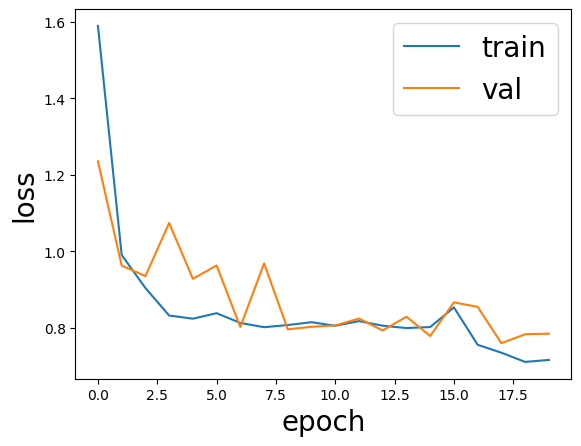

In [104]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()